Step 1: Cleaning Text

In [ ]:
# Cleaning Text

import re
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
text = pd.read_csv('/content/Airline_Reviews_Combined.csv')                     # importing the data

In [ ]:
def clean_review(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))                                 # Removes all special characters and numericals leaving the alphabets

    text = text.lower()                                                         # Converting all the alphabets to lowercase

    tokens = nltk.word_tokenize(text)                                           # Tokenizing each review

    stop_words = set(stopwords.words('english'))                                # Removing stopwords
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()                                            # Lemmatize each word in each review
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Combine the cleaned tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [ ]:
import pandas as pd

In [ ]:
# Cleaning the text in the review column

text['cleaned reviews'] = text['review'].apply(clean_review)
text.head()

,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,ground_service,value_for_money,recommended,overall_rating,review,Airlines,year,month,cleaned reviews
0,Solo Leisure,Economy Class,Bangalore to Paris via Delhi,2024-08-01,2.0,1.0,2.0,1.0,1.0,1.0,0,1.0,Had a flight on 31 August from Bangalore to...,Indigo,2024,8,flight august bangalore paris stop delhi altho...
1,Family Leisure,Economy Class,Sydney to Amritsar via Delhi,2024-09-01,3.0,4.0,1.0,1.0,1.0,2.0,0,1.0,I had the worst experience with Air India. ...,Indigo,2024,9,worst experience air india carry bag lost hand...
2,Business,Business Class,London to Delhi,2024-09-01,5.0,5.0,5.0,5.0,5.0,5.0,1,10.0,My husband left his passport at home and is f...,Indigo,2024,9,husband left passport home flying air india st...
3,Family Leisure,Economy Class,Delhi to Sydney,2024-09-01,1.0,1.0,2.0,1.0,2.0,1.0,0,1.0,"On the way in from Sydney to Delhi , there ...",Indigo,2024,9,way sydney delhi sound return flight even bad ...
4,Family Leisure,Economy Class,Kochi to Vancouver,2023-12-01,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,"This is the worst airlines anyone can choose,...",Indigo,2023,12,worst airline anyone choose flight family dece...


In [ ]:
text[["review", "cleaned reviews"]]            # Creating a new table with only two columns

,review,cleaned reviews
0,Had a flight on 31 August from Bangalore to...,flight august bangalore paris stop delhi altho...
1,I had the worst experience with Air India. ...,worst experience air india carry bag lost hand...
2,My husband left his passport at home and is f...,husband left passport home flying air india st...
3,"On the way in from Sydney to Delhi , there ...",way sydney delhi sound return flight even bad ...
4,"This is the worst airlines anyone can choose,...",worst airline anyone choose flight family dece...
...,...,...
3740,Bangalore to Pune with SpiceJet. Pathetic exp...,bangalore pune spicejet pathetic experience al...
3741,Horrible experience with SpiceJet from Chand...,horrible experience spicejet chandigarh new de...
3742,Travelling on route Port Blair to Chennai. The...,travelling route port blair chennai flight dep...
3743,"Dubai to Pune, and have been a frequent flyer ...",dubai pune frequent flyer spicejet usually boo...


Step 2: Generating Sentiment Scores for Cleaned Reviews

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment and analysis
def vader_sentiment_analysis(review):
    vs = analyzer.polarity_scores(review)
    compound = vs['compound']
    sentiment = 'Positive' if compound >= 0.5 else 'Negative' if compound < 0 else 'Neutral'
    return compound, sentiment

text[['Compound Score', 'Sentiment']] = text['cleaned reviews'].apply(vader_sentiment_analysis).tolist()

In [ ]:
text.head()

,travel_type,travel_class,route,date,seating_comfort,staff_service,food_quality,entertainment,ground_service,value_for_money,recommended,overall_rating,review,Airlines,year,month,cleaned reviews,Compound Score,Sentiment
0,Solo Leisure,Economy Class,Bangalore to Paris via Delhi,2024-08-01,2.0,1.0,2.0,1.0,1.0,1.0,0,1.0,Had a flight on 31 August from Bangalore to...,Indigo,2024,8,flight august bangalore paris stop delhi altho...,0.7299,Positive
1,Family Leisure,Economy Class,Sydney to Amritsar via Delhi,2024-09-01,3.0,4.0,1.0,1.0,1.0,2.0,0,1.0,I had the worst experience with Air India. ...,Indigo,2024,9,worst experience air india carry bag lost hand...,-0.9178,Negative
2,Business,Business Class,London to Delhi,2024-09-01,5.0,5.0,5.0,5.0,5.0,5.0,1,10.0,My husband left his passport at home and is f...,Indigo,2024,9,husband left passport home flying air india st...,0.9413,Positive
3,Family Leisure,Economy Class,Delhi to Sydney,2024-09-01,1.0,1.0,2.0,1.0,2.0,1.0,0,1.0,"On the way in from Sydney to Delhi , there ...",Indigo,2024,9,way sydney delhi sound return flight even bad ...,-0.7803,Negative
4,Family Leisure,Economy Class,Kochi to Vancouver,2023-12-01,1.0,1.0,1.0,1.0,1.0,1.0,0,1.0,"This is the worst airlines anyone can choose,...",Indigo,2023,12,worst airline anyone choose flight family dece...,-0.8591,Negative


In [ ]:
text.to_csv("Model_Data.csv", index= False)

In [ ]:
# Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
sentiment_counts = text['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Negative    2018
Positive    1365
Neutral      362
Name: count, dtype: int64


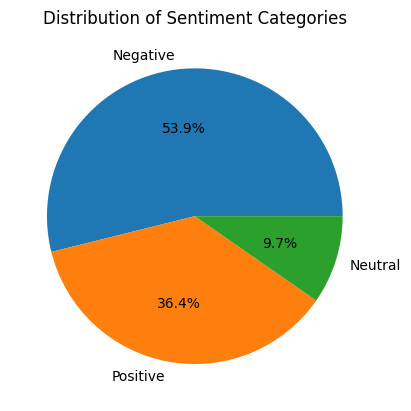

In [ ]:
# Get the counts of each sentiment category
counts = text['Sentiment'].value_counts()

# Create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Categories')
plt.show()

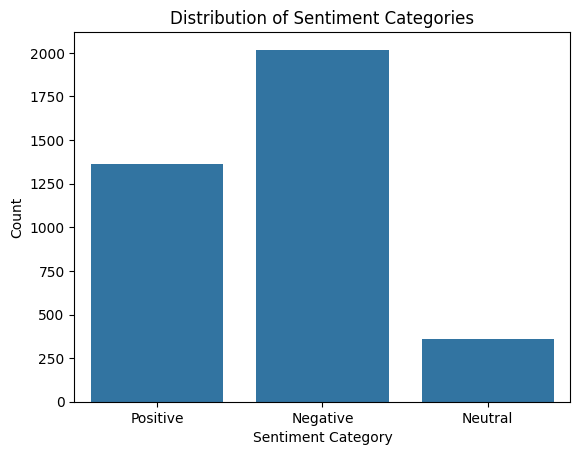

In [ ]:
# Visualize the distribution of sentiment categories in the dataset
sns.countplot(x='Sentiment', data=text)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

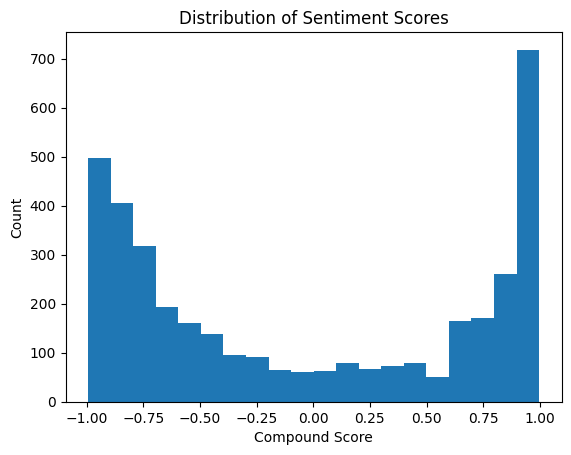

In [ ]:
# create a histogram of the Compound Score in the data frame.
plt.hist(text['Compound Score'], bins=20)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Count')
plt.show()

In [ ]:
text['Length'] = text['cleaned reviews'].apply(len)

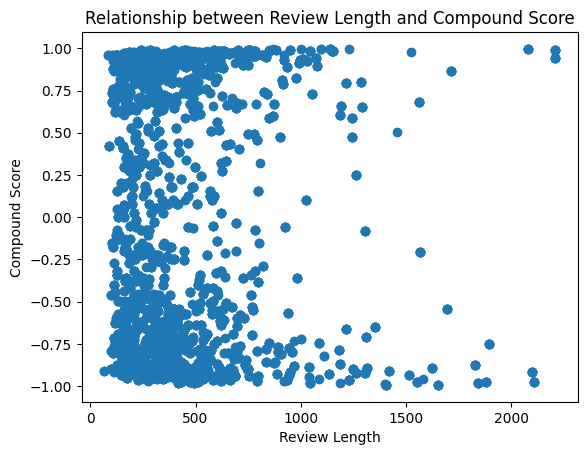

In [ ]:
plt.scatter(text['Length'], text['Compound Score'])
plt.title('Relationship between Review Length and Compound Score')
plt.xlabel('Review Length')
plt.ylabel('Compound Score')
plt.show()

In [ ]:
seat_type_counts = text["travel_class"].value_counts()
print(seat_type_counts)

travel_class
Economy Class      3288
Business Class      382
Premium Economy      59
First Class          16
Name: count, dtype: int64


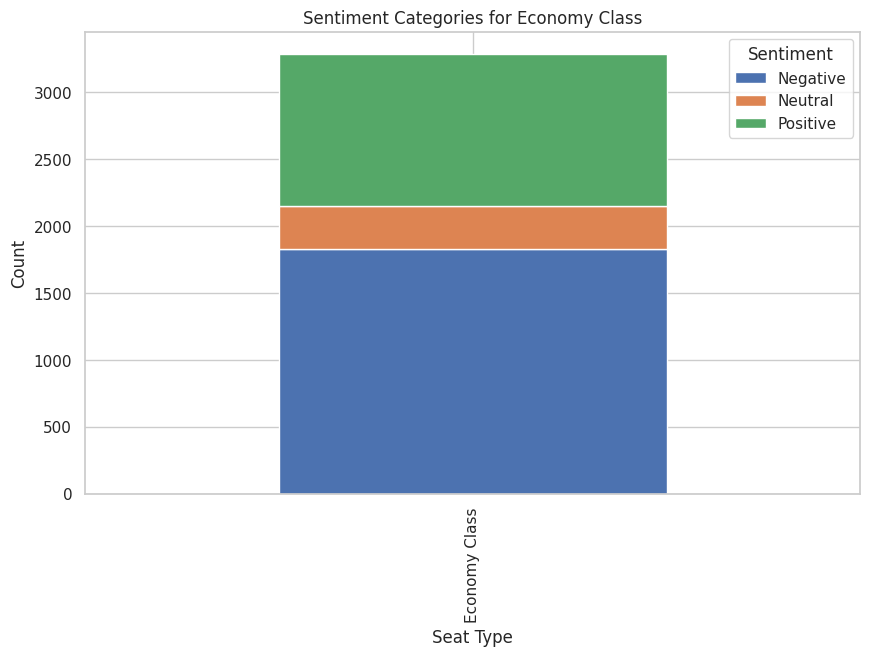

In [ ]:
# Filter the DataFrame to include only rows with 'Economy Class' seat type
economy_df = text[text['travel_class'] == 'Economy Class']

# Create a pivot table with sentiment categories by seat type
pivot = pd.pivot_table(economy_df, values='review', index='travel_class', columns='Sentiment', aggfunc=len)

# Create a stacked bar plot
sns.set(style='whitegrid')
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Categories for Economy Class')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

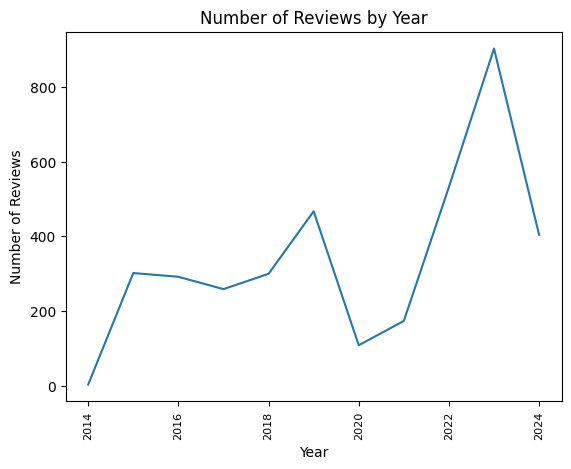

In [ ]:
review_counts = text.groupby('year').size().reset_index(name='count')
plt.plot(review_counts['year'], review_counts['count'])
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90,fontsize=8)
plt.show()

# change x axis labels to 90 degree

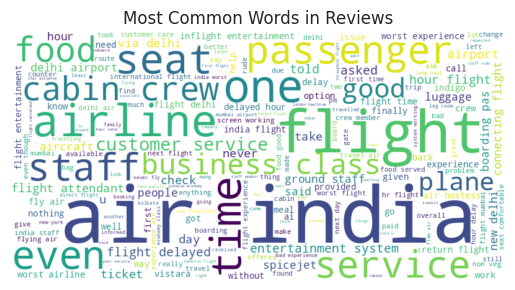

In [ ]:
words = ' '.join(text['cleaned reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()